In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from Filter_extreme_earns import filter_extreme_earns

from sklearn.model_selection import train_test_split
import lightgbm as lgb
from dataset_manipulation_funcs import load_filter_dataset

import warnings
import pickle

warnings.simplefilter('ignore', DeprecationWarning)

In [2]:
# Import the dataset

categorical_features = [
    'PEIOOCC', 'A_HGA', 'PRDTRACE', 'FKIND', 'A_CLSWKR', 'A_WKSTAT', 'A_MJIND',
    'MJOCC', 'PTYN', 'LJCW', 'WEMOCG', 'MIG_CBST', 'MIGSAME',
    'H_TYPE', 'H_LIVQRT', 'GTCBSA', 'GESTFIPS'
]
numerical_features = [
    'H_NUMPER', 'FPERSONS', 'FOWNU6', 'FOWNU18', 'A_AGE', 'A_HRS1', 'A_USLHRS',
    'PHMEMPRS', 'HRSWK', 'HNUMFAM', 'ERN_VAL'
]
#prediction label
labels = ['A_SEX']
features = categorical_features + numerical_features
#Dont load the dataset again if it is already loaded (for debuging purpose)
if 'X'  not in locals():
    X, y, categorical_index = load_filter_dataset(
            'data/income_data_2017_clean_zeros.csv.bz2',
            max_ern=250000, min_ern=5000,
            categorical_features=categorical_features, 
            numerical_features=numerical_features,
            labels=labels, threshold=40000)


# Spliting to train and test
y2 = np.ravel(y)
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.25) 
d_train = lgb.Dataset(X_train, label=y_train,feature_name=features)
d_test = lgb.Dataset(X_test, label=y_test, feature_name=features)

In [7]:
est = pickle.load(open( 'best_estimators/best_params_gbm_estimator_2.p', 'rb' ))

In [8]:
params = est['gbm_estimator']['Parameters']

In [10]:

model = lgb.train(params, d_train, 1000, valid_sets=[d_test], verbose_eval=0, feature_name=features  )

In [11]:
import shap

In [12]:
shap_values = shap.TreeExplainer(model).shap_values(X)

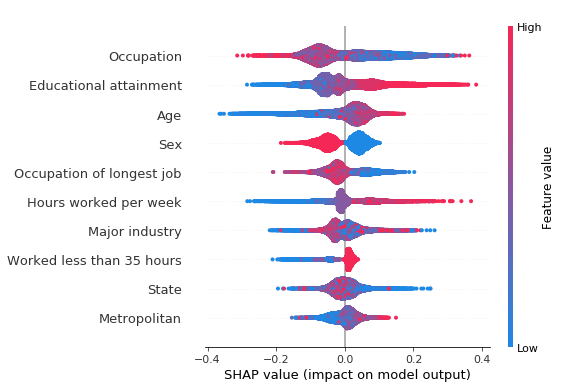

In [9]:
categorical_features_plot = [
    'Occupation', 'Educational attainment', 'Race', 'Kind of family', 'Class of worker', 'Full/part-time status', 
    'Major industry',
    'Major occupation', 'Worked less than 35 hours', 'Class of worker', 'Sex', 'Occupation of longest job', 'MIG_CBST', 'MIGSAME',
    'H_TYPE', 'H_LIVQRT', 'Metropolitan', 'State'
]
numerical_features_plot = [
    'H_NUMPER', 'FPERSONS', 'FOWNU6', 'FOWNU18', 'Age', 'Hours worked at all jobs', 'Usual hrs worked per week',
    'PHMEMPRS', 'Hours worked per week', 'HNUMFAM'
]
#prediction label
labels = ['ERN_VAL']
features_plot = categorical_features_plot + numerical_features_plot
shap.summary_plot(shap_values, X, show=False,feature_names=features_plot, max_display=10 )
plt.show()